------------------------------------------------------------------------------------------------------------------------------------------------------

## NOISE NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()

Welcome to JupyROOT 6.28/00
You have latex installed!. Applying default configuration (tex=True)


In [2]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [3]:
info           = read_input_file("TUTORIAL") # Read input file
calib_runs     = [ 1]                        # Calibration runs
laser_runs     = [ 9]                        # Laser runs
alpha_runs     = [25]                        # Alpha runs
muons_runs     = [29]                        # Muons runs
noise_runs     = [128]                       # Noise runs

all_runs = calib_runs + laser_runs + alpha_runs + muons_runs + noise_runs
channels = [0,6]

In [5]:
my_runs_calib = load_npy(np.asarray(calib_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_laser = load_npy(np.asarray(laser_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_alpha = load_npy(np.asarray(alpha_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_muons = load_npy(np.asarray(muons_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_noise = load_npy(np.asarray(noise_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)

time_wvf = np.arange(len(my_runs_calib[calib_runs[0]][channels[0]]["AnaAveWvf"][0]))*4e-9
time_all = np.arange(len(my_runs_calib[calib_runs[0]][channels[0]]["TimeStamp"]))*4e-9

my_runs = {"Calibration":my_runs_calib[calib_runs[0]], "Alpha": my_runs_alpha[alpha_runs[0]], "Laser": my_runs_laser[laser_runs[0]], "Muons": my_runs_muons[muons_runs[0]], "Noise": my_runs_noise[noise_runs[0]]}

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!



## STD

In [6]:
import matplotlib.colors as mcolors

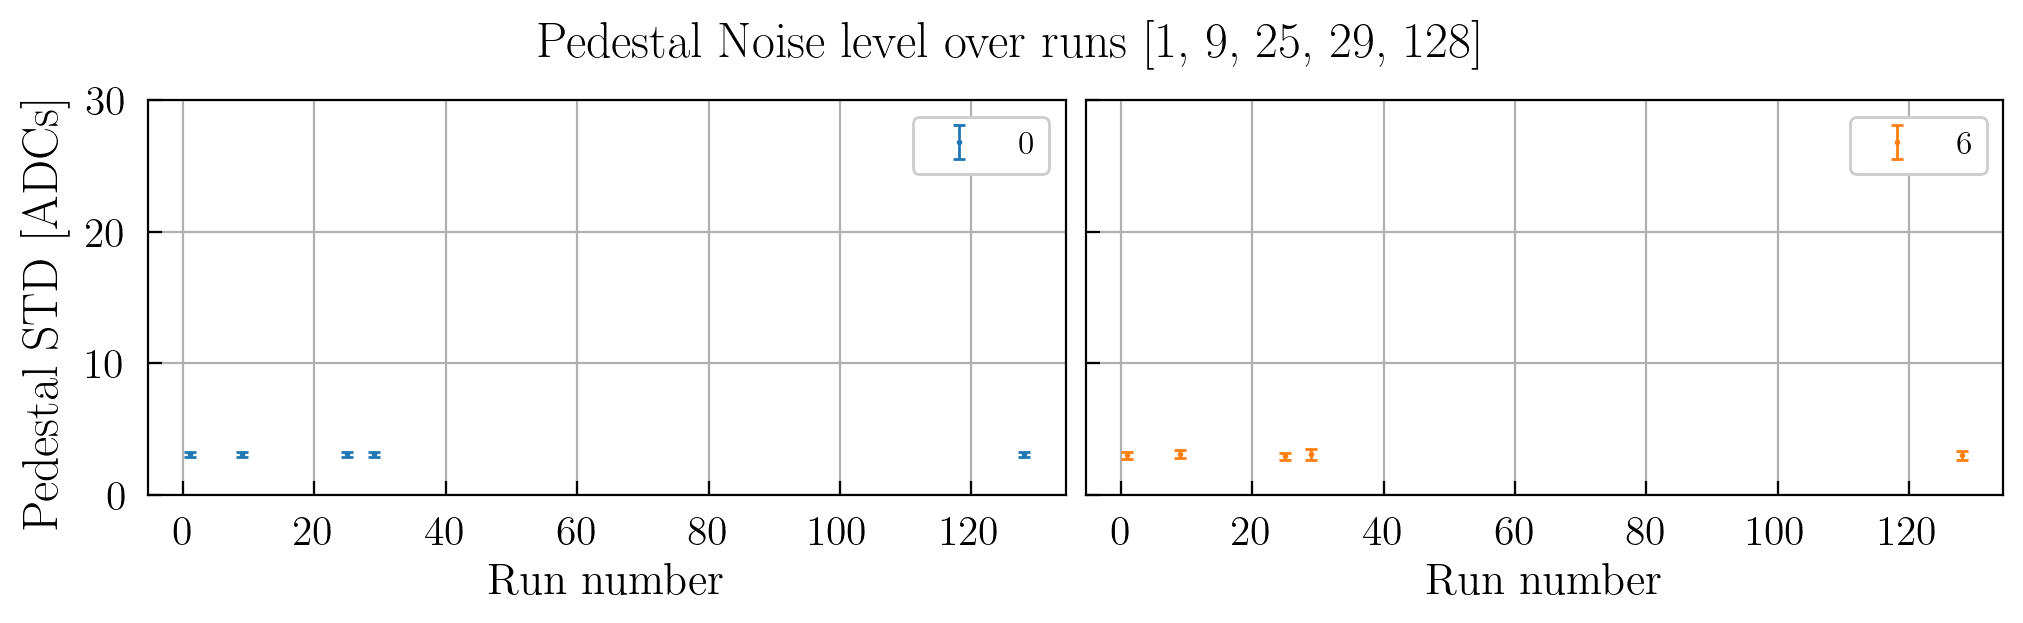

In [7]:
key = "AnaPedSTD"

fig, axs = plt.subplots(dpi=200,ncols=len(channels),figsize=[10,3],sharey=True)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.suptitle("Pedestal Noise level over runs "+str(all_runs))
plt.ylim(0,30)
fig.supylabel(  "Pedestal STD [ADCs]"  )
for r,run in enumerate(my_runs.keys()):
    for c,ch in enumerate(channels):
        PedSTD       = my_runs[run][ch][key]
        counts, bins = np.histogram(PedSTD, 300,[0,20])
        MeanValue    = bins[np.argmax(counts)]
        ErrorsSTD    = np.std(PedSTD[np.where(PedSTD<50)[0]])

        axs[c].errorbar (all_runs[r], MeanValue, yerr=ErrorsSTD,color=colors[c],linewidth=0,marker='o',markersize=1,elinewidth=1,capsize=2)
        axs[c].legend([channels[c]])
        axs[c].grid()
        axs[c].set_xlabel("Run number")
plt.show()

## MEAN

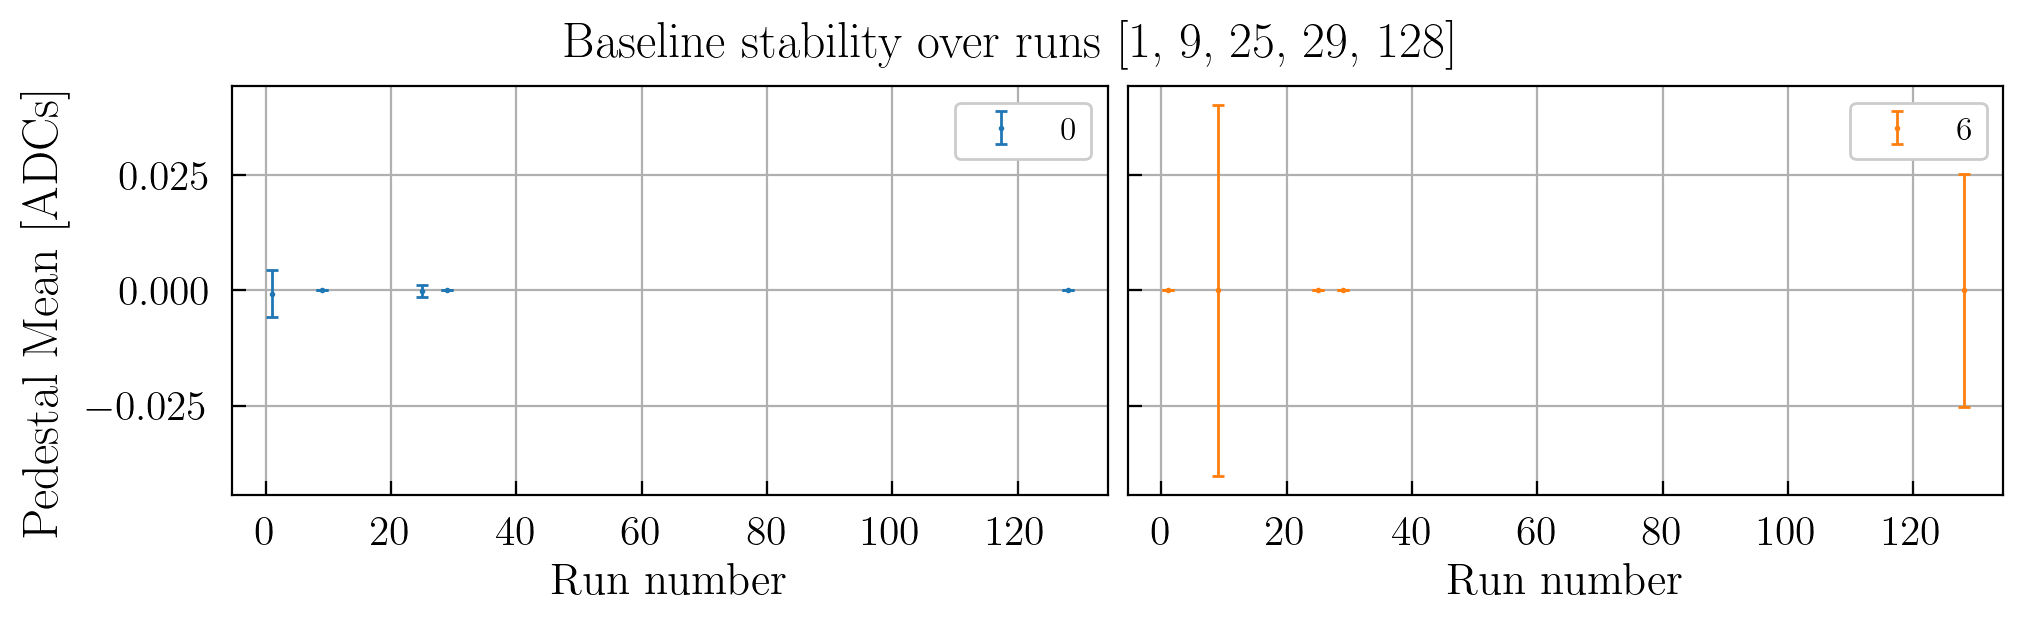

In [8]:
key = "AnaPedMean"

fig, axs = plt.subplots(dpi=200,ncols=len(channels),figsize=[10,3],sharey=True)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.suptitle("Baseline stability over runs "+str(all_runs))
fig.supylabel(  "Pedestal Mean [ADCs]"  )
for r,run in enumerate(my_runs.keys()):
    for c,ch in enumerate(channels):
        PedMean      = my_runs[run][ch][key]
        counts, bins = np.histogram(PedMean, 1000)
        MeanValue    = bins[np.argmax(counts)]
        # offset=1.26e4; MeanValue[:-1]-=offset
        ErrorsSTD    = np.std(PedMean[np.where(PedSTD<50)[0]])

        axs[c].errorbar (all_runs[r], MeanValue, yerr=ErrorsSTD,color=colors[c],linewidth=0,marker='o',markersize=1,elinewidth=1,capsize=2)
        axs[c].legend([channels[c]])
        axs[c].grid()
        axs[c].set_xlabel("Run number")
plt.show()

## BY CHANNELS

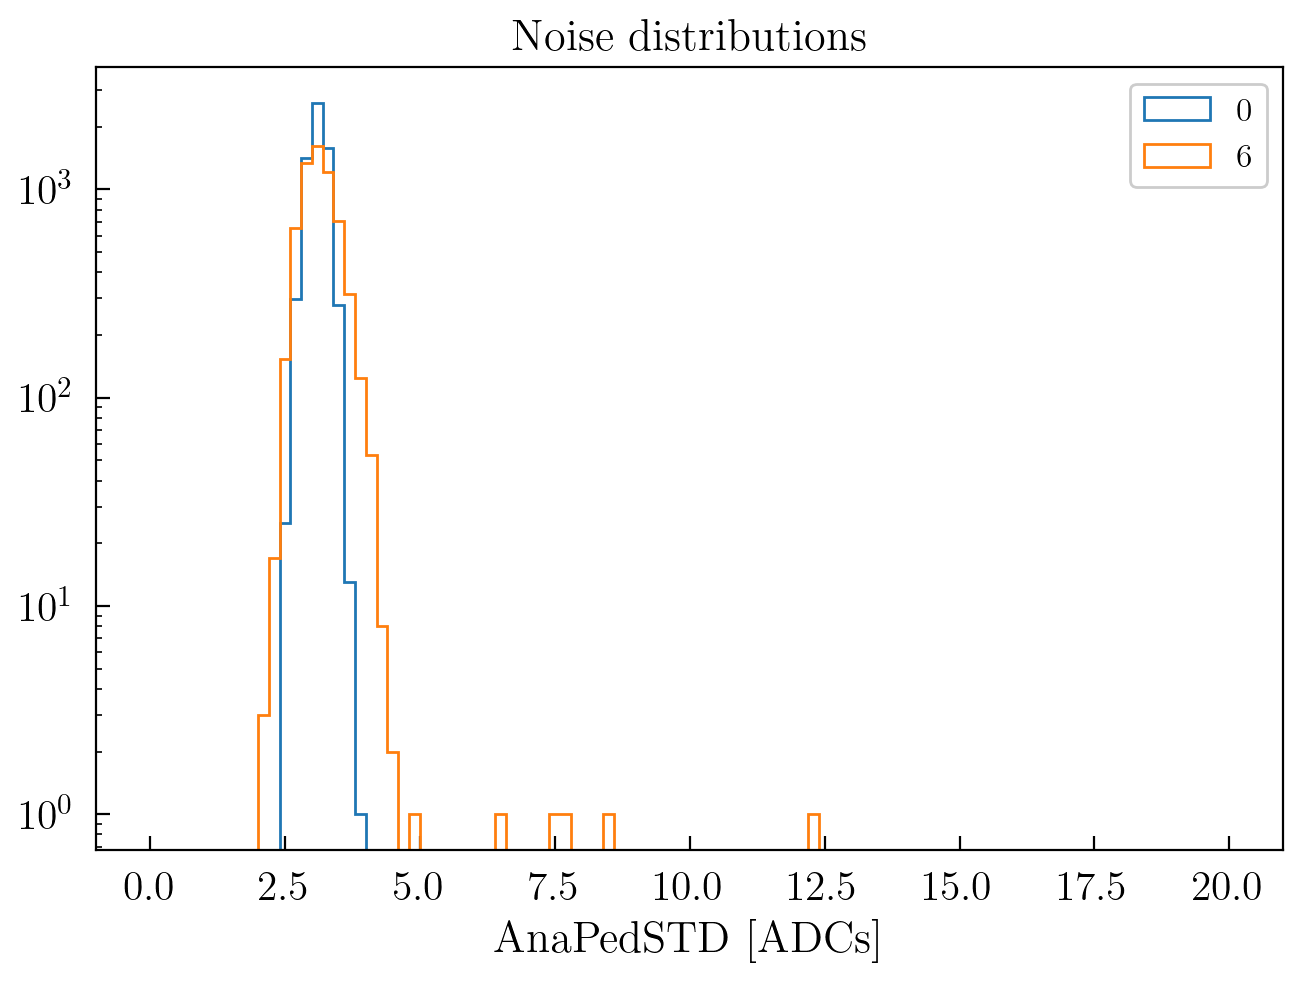

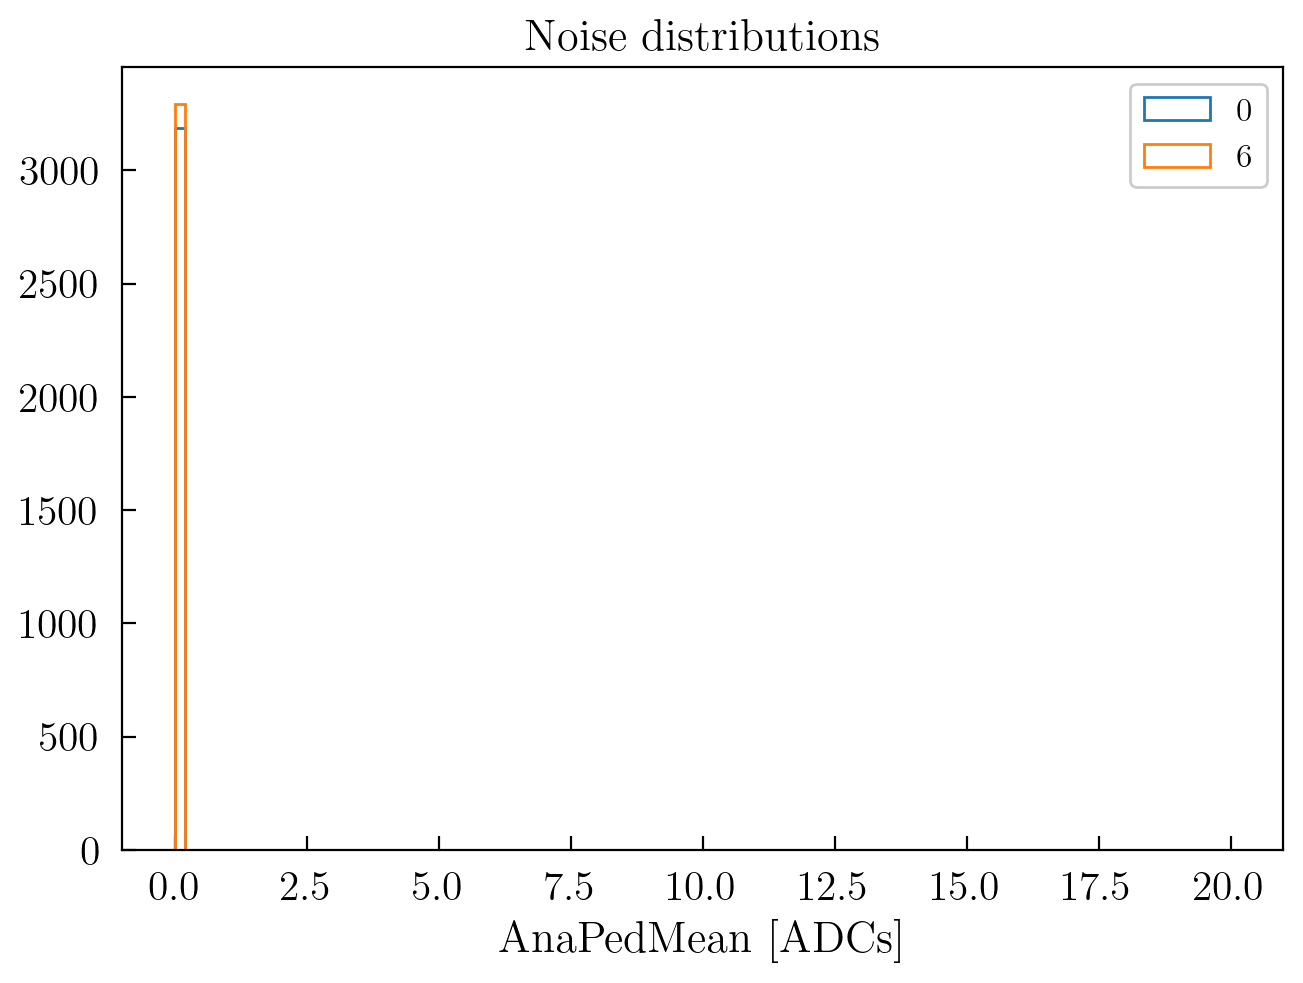

In [9]:
keys = ["AnaPedSTD","AnaPedMean"]
bins = [100,100]
rang = [[0,20],[0,20]]
logy = [True,False]

for k,key in enumerate(keys):
    plt.figure(dpi=200)
    for c,ch in enumerate(channels):
        PedSTD = my_runs[run][ch][key]
        plt.hist(PedSTD, bins[k],rang[k],histtype="step")

    plt.legend(channels)
    plt.title ("Noise distributions")
    plt.xlabel(key+" [ADCs]")
    if logy[k]: plt.semilogy()
    plt.show()